In [40]:
#Import Libraries


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


In [41]:
#Load All Data

sales = pd.read_csv("data/Online_Sales.csv")
customers = pd.read_excel("data/CustomersData.xlsx")
coupons = pd.read_csv("data/Discount_Coupon.csv")
marketing = pd.read_csv("data/Marketing_Spend.csv")
tax = pd.read_excel("data/Tax_amount.xlsx")

In [42]:

#Initial Exploration
sales.info()
sales.head()

customers.info()
coupons.info()
marketing.info()
tax.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           52924 non-null  int64  
 1   Transaction_ID       52924 non-null  int64  
 2   Transaction_Date     52924 non-null  object 
 3   Product_SKU          52924 non-null  object 
 4   Product_Description  52924 non-null  object 
 5   Product_Category     52924 non-null  object 
 6   Quantity             52924 non-null  int64  
 7   Avg_Price            52924 non-null  float64
 8   Delivery_Charges     52924 non-null  float64
 9   Coupon_Status        52924 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 4.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     1468 non-null   i

In [43]:
# Missing values
sales.isnull().sum()

# Duplicates
sales.duplicated().sum()


np.int64(0)

In [44]:
sales.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status
0,17850,16679,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
1,17850,16680,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
2,17850,16681,1/1/2019,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used
3,17850,16682,1/1/2019,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used
4,17850,16682,1/1/2019,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used


C:\Users\Harsha vardhan\AppData\Local\Temp\ipykernel_44548\1634160998.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Acquisition_Month', y='New_Customers_counts', data=Count_acquisition, palette='Blues_d')


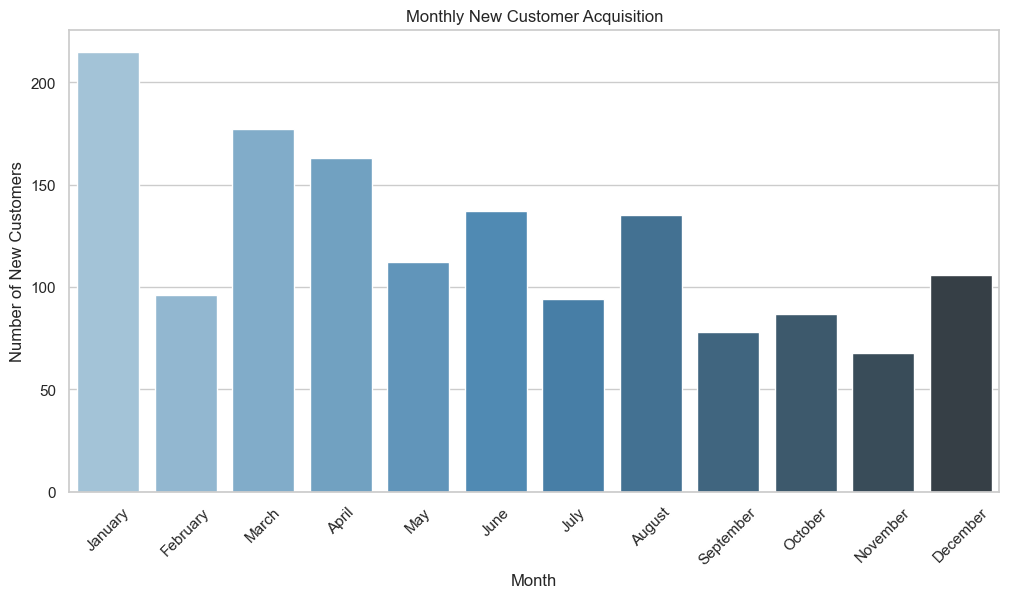

In [57]:
#Business Question 1:


# Step 1: Prepare the Data for Acquisition Analysis
sales['Transaction_Date'] = pd.to_datetime(sales['Transaction_Date'])
first_purchase = sales.groupby('CustomerID')['Transaction_Date'].min().reset_index()
first_purchase['Acquisition_Month'] = first_purchase['Transaction_Date'].dt.month_name()

# Count new customers by month
Count_acquisition = first_purchase['Acquisition_Month'].value_counts().reset_index()
Count_acquisition.columns = ['Acquisition_Month', 'New_Customers_counts']

# Correct Month Order using Categorical
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
Count_acquisition['Acquisition_Month'] = pd.Categorical(Count_acquisition['Acquisition_Month'], 
                                                        categories=month_order, ordered=True)

# Sort properly
Count_acquisition = Count_acquisition.sort_values('Acquisition_Month')

# Step 2: Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x='Acquisition_Month', y='New_Customers_counts', data=Count_acquisition, palette='Blues_d')
plt.title('Monthly New Customer Acquisition')
plt.xlabel('Month')
plt.ylabel('Number of New Customers')
plt.xticks(rotation=45)
plt.show()


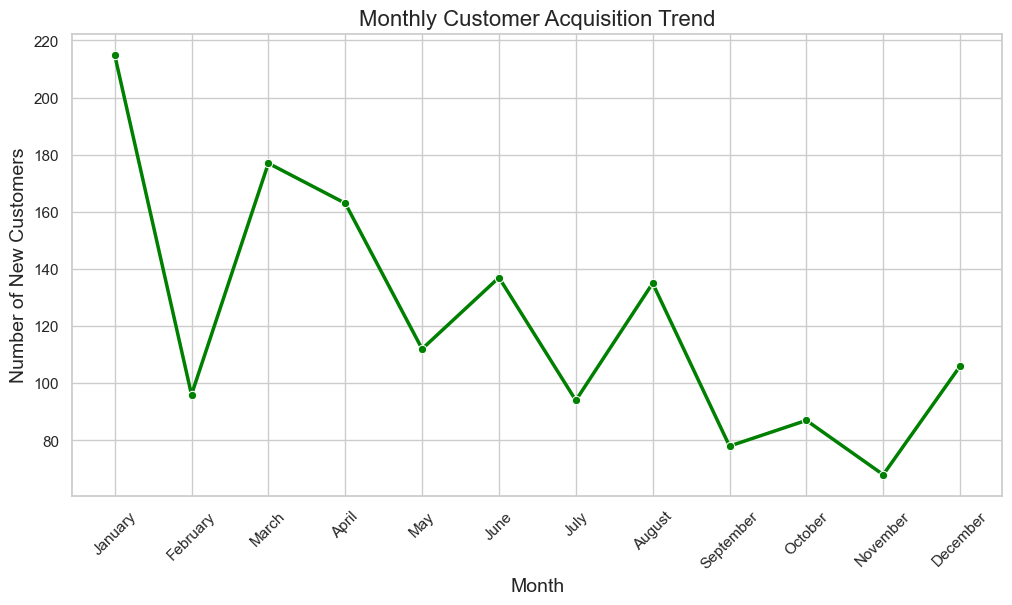

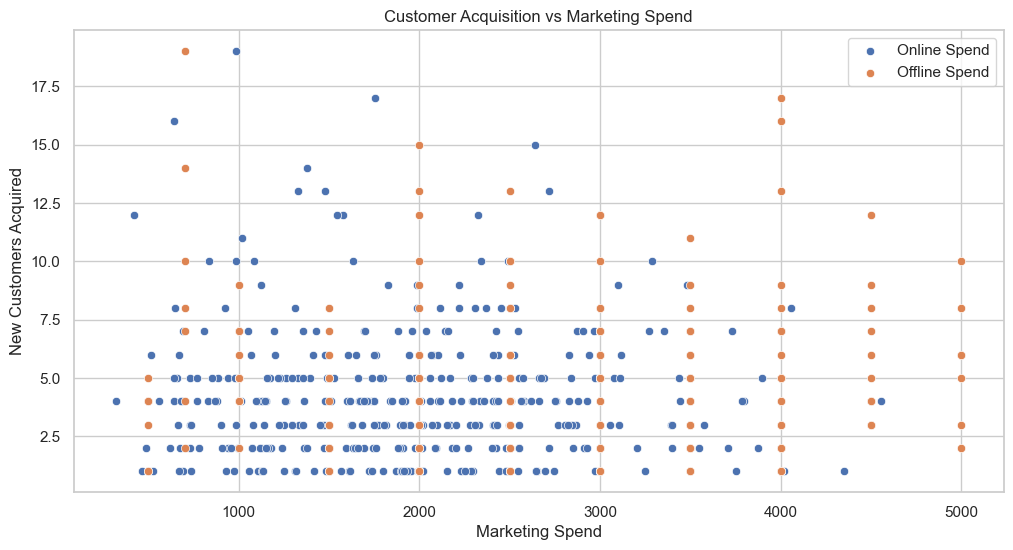

               Online_Spend  Offline_Spend  New_Customers
Online_Spend       1.000000       0.359650      -0.033492
Offline_Spend      0.359650       1.000000      -0.024382
New_Customers     -0.033492      -0.024382       1.000000


In [69]:
#Business Question 2 : 


plt.figure(figsize=(12,6))
sns.lineplot(x='Acquisition_Month', y='New_Customers_counts', 
             data=Count_acquisition, marker='o', linewidth=2.5, color='green')

plt.title("Monthly Customer Acquisition Trend", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Number of New Customers", fontsize=14)
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


#Analyze whether higher marketing spend (online/offline) correlates with more new customers acquired on those days.

marketing['Date'] = pd.to_datetime(marketing['Date'])
daily_acquisition = first_purchase.groupby('Transaction_Date').size().reset_index(name='New_Customers')
# Merge on date
merged = pd.merge(daily_acquisition, marketing, left_on='Transaction_Date', right_on='Date')

# Drop duplicate date column if needed
merged.drop(columns=['Date'], inplace=True)
plt.figure(figsize=(12,6))
sns.scatterplot(data=merged, x='Online_Spend', y='New_Customers', label='Online Spend')
sns.scatterplot(data=merged, x='Offline_Spend', y='New_Customers', label='Offline Spend')
plt.title("Customer Acquisition vs Marketing Spend")
plt.xlabel("Marketing Spend")
plt.ylabel("New Customers Acquired")
plt.legend()
plt.show()
print(merged[['Online_Spend', 'Offline_Spend', 'New_Customers']].corr())



In [64]:
#Business Question 3 :

#Identify periods with the strongest and weakest retention rates.
# What strategies could be implemented to improve retention during weaker months?


sales['Transaction_Month'] = sales['Transaction_Date'].dt.to_period('M')
Transaction_count  = sales.groupby(['CustomerID','Transaction_Month']).size().reset_index(name = 'Count_Transactions')
Transaction_count.head()
total_transactions_per_customer = Transaction_count.groupby('CustomerID')['Count_Transactions'].sum().reset_index()
total_transactions_per_customer.head()
filtered_customers = total_transactions_per_customer[total_transactions_per_customer['Count_Transactions'] >= 2]
filtered_customers



,CustomerID,Count_Transactions
0,12346,2
1,12347,60
2,12348,23
3,12350,17
4,12356,36
...,...,...
1462,18256,4
1463,18259,7
1464,18260,40
1465,18269,8
